In [1]:
import os
import sys
import random
from glob import glob
from copy import deepcopy
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

# enable use of local modules
repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from mejiro.instruments.hwo import HWO
from mejiro.synthetic_image import SyntheticImage
from mejiro.galaxy_galaxy import GalaxyGalaxy, SampleGG, SampleBELLS, SampleSL2S
from mejiro.exposure import Exposure
from mejiro.utils import util, lenstronomy_util

# set matplotlib style
# plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

# set HWO directory
hwo_dir = os.path.join(repo_dir, 'hwo')

Warning, 5 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 3590 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 293 of 2920 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 3590 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 293 of 2920 bins contained negative fluxes; they have been set to zero.


In [2]:
strong_lens = SampleSL2S()

In [3]:
hwo = HWO()
kwargs_psf = lenstronomy_util.get_gaussian_psf_kwargs(hwo.get_psf_fwhm('J'))

/grad/bwedig/mejiro/mejiro/synthetic_image.py:119: UserWarning: Supersampling factor less than 5 may not be sufficient for accurate results, especially when convolving with a non-trivial PSF
  warnings.warn('Supersampling factor less than 5 may not be sufficient for accurate results, especially when convolving with a non-trivial PSF')


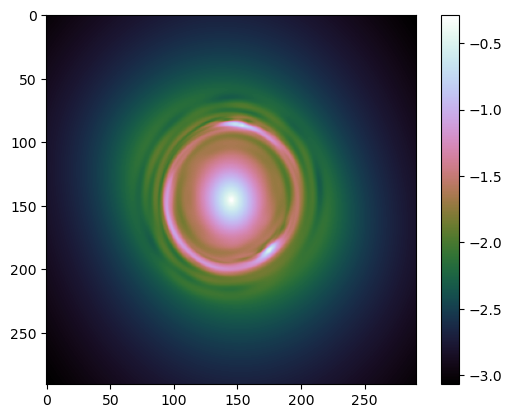

In [4]:
synthetic_image = SyntheticImage(strong_lens=strong_lens,
                                instrument=hwo,
                                band='J',
                                kwargs_numerics={'supersampling_factor': 1},
                                kwargs_psf=kwargs_psf,
                                pieces=True,
                                verbose=False)

plt.imshow(np.log10(synthetic_image.image), cmap='cubehelix')
plt.colorbar()
plt.show()

/tmp/ipykernel_323847/1616754784.py:6: RuntimeWarning: invalid value encountered in log10
  ax[2].imshow(np.log10(synthetic_image.source_surface_brightness), cmap='cubehelix')


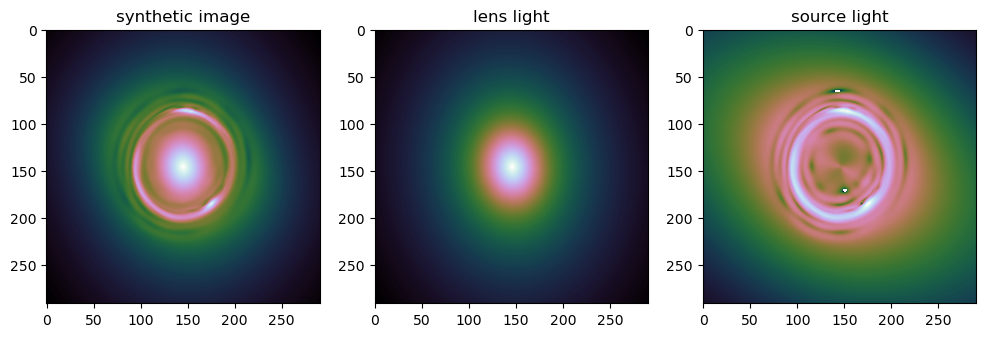

In [5]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(np.log10(synthetic_image.image), cmap='cubehelix')
ax[0].set_title('synthetic image')
ax[1].imshow(np.log10(synthetic_image.lens_surface_brightness), cmap='cubehelix')
ax[1].set_title('lens light')
ax[2].imshow(np.log10(synthetic_image.source_surface_brightness), cmap='cubehelix')
ax[2].set_title('source light')
plt.show()

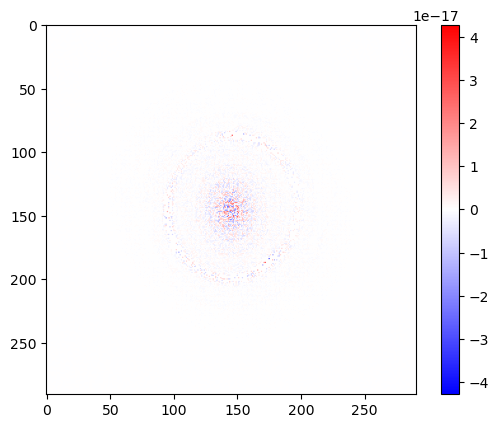

In [6]:
plt.imshow((synthetic_image.image - synthetic_image.lens_surface_brightness) - synthetic_image.source_surface_brightness, cmap='bwr', norm=matplotlib.colors.CenteredNorm())
plt.colorbar()
plt.show()

In [7]:
exposure = Exposure(synthetic_image,
                    exposure_time=1e4,
                    verbose=False)

plt.imshow(np.log10(exposure.exposure), cmap='cubehelix')
plt.colorbar()
plt.show()

ValueError: Negative pixel values in source image

In [8]:
lens_list = util.unpickle_all('/data/bwedig/mejiro/hwo/dinos_good')

In [12]:
pprint(lens_list[0].kwargs_model)

{'cosmo': FlatLambdaCDM(name='Planck18',
                        H0=<Quantity 67.66 km / (Mpc s)>,
                        Om0=0.30966,
                        Tcmb0=<Quantity 2.7255 K>,
                        Neff=3.046,
                        m_nu=<Quantity [0.  , 0.  , 0.06] eV>,
                        Ob0=0.04897),
 'lens_light_model_list': ['SERSIC_ELLIPSE',
                           'SERSIC_ELLIPSE',
                           'SERSIC_ELLIPSE',
                           'SERSIC_ELLIPSE'],
 'lens_model_list': ['PEMD', 'SHEAR_GAMMA_PSI'],
 'lens_redshift_list': [0.23, 0.23],
 'source_light_model_list': ['SHAPELETS',
                             'SERSIC_ELLIPSE',
                             'SHAPELETS',
                             'SERSIC_ELLIPSE'],
 'source_redshift_list': [0.93, 0.93, 0.93, 0.93],
 'z_source': 0.93,
 'z_source_convention': 5.0}


In [13]:
pprint(lens_list[0].kwargs_params)

{'kwargs_lens': [{'center_x': 0.0057191207462888,
                  'center_y': 0.0008977770532772498,
                  'e1': -0.12110457621118777,
                  'e2': 0.1558830493903703,
                  'gamma': 2.667879754070831,
                  'theta_E': 0.9436753999311065},
                 {'dec_0': 0,
                  'gamma_ext': 0.012221908500621211,
                  'psi_ext': -0.5105336085300802,
                  'ra_0': 0}],
 'kwargs_lens_light': [{'R_sersic': 3.4469319150573257,
                        'amp': 0.493339058522739,
                        'center_x': 0.0057191207462888,
                        'center_y': 0.0008977770532772498,
                        'e1': -0.054110677673533315,
                        'e2': 0.07056241490969933,
                        'n_sersic': 4.0},
                       {'R_sersic': 0.1926278446206916,
                        'amp': 8.789473690288327,
                        'center_x': 0.0057191207462888,
                  

/tmp/ipykernel_323847/30960027.py:18: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(synthetic_image.source_surface_brightness), cmap=cmap, norm=Normalize())


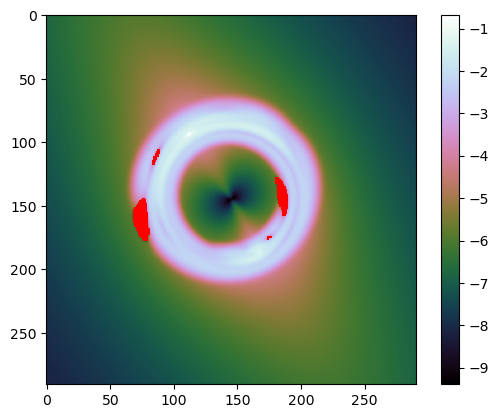

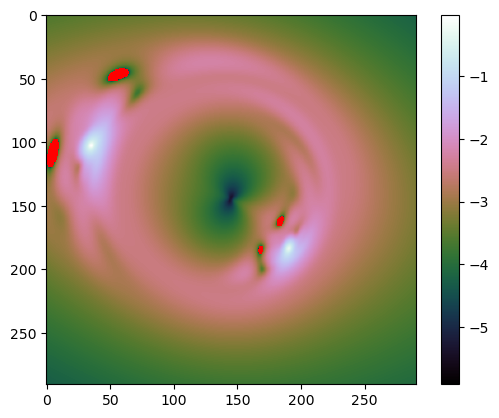

In [11]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm

for strong_lens in lens_list[:2]:
    synthetic_image = SyntheticImage(strong_lens=strong_lens,
                                    instrument=hwo,
                                    band='J',
                                    kwargs_numerics={'supersampling_factor': 1},
                                    kwargs_psf=kwargs_psf,
                                    pieces=True,
                                    verbose=False)
    
    cmap = cm.get_cmap('cubehelix').copy()
    cmap.set_bad(color='red')

    # plt.imshow(np.log10(synthetic_image.image), cmap=cmap, norm=Normalize())
    # plt.imshow(np.log10(synthetic_image.lens_surface_brightness), cmap=cmap, norm=Normalize())
    plt.imshow(np.log10(synthetic_image.source_surface_brightness), cmap=cmap, norm=Normalize())
    plt.colorbar()
    plt.show()

    # exposure = Exposure(synthetic_image,
    #                     exposure_time=1,
    #                     verbose=False)


    # plt.imshow(np.log10(exposure.exposure), cmap='cubehelix')
    # plt.colorbar()
    # plt.show()